In [106]:
"""
Data Dictionary
Variable

survival
Survival
0 = No, 1 = Yes

pclass
Ticket class
1 = 1st, 2 = 2nd, 3 = 3rd

sex
Sex

Age
Age in years

sibsp
# of siblings / spouses aboard the Titanic

parch
# of parents / children aboard the Titanic

ticket
Ticket number

fare
Passenger fare

cabin
Cabin number

embarked
Port of Embarkation
C = Cherbourg, Q = Queenstown, S = Southampton
"""

'\nData Dictionary\nVariable\nDefinition\nKey\nsurvival\nSurvival\n0 = No, 1 = Yes\npclass\nTicket class\n1 = 1st, 2 = 2nd, 3 = 3rd\nsex\nSex\n\nAge\nAge in years\n\nsibsp\n# of siblings / spouses aboard the Titanic\n\nparch\n# of parents / children aboard the Titanic\n\nticket\nTicket number\n\nfare\nPassenger fare\n\ncabin\nCabin number\n\nembarked\nPort of Embarkation\nC = Cherbourg, Q = Queenstown, S = Southampton\n'

# validationの工夫

In [74]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
forest = RandomForestClassifier()
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train["cha"] = 0
df_test["cha"] = 1
df_train["Sex"] = le.fit_transform(df_train["Sex"])
df_test["Sex"] = le.fit_transform(df_test["Sex"])
s = pd.get_dummies(df_train["Embarked"])
df_train = pd.merge(df_train,s,right_index=True,left_index=True)
s = pd.get_dummies(df_test["Embarked"])
df_test = pd.merge(df_test,s,right_index=True,left_index=True)
df_train = df_train.iloc[:,2:]
df_test = df_test.iloc[:,1:]
print(df_train.columns)
print(df_test.columns)
print(df_train.head())

df_cha = pd.concat([df_train,df_test],axis=0)
df_cha["Embarked"].fillna("S",inplace=True)
print(df_cha.shape)
print(df_cha.isnull().sum())
print(df_cha.groupby(["Embarked"]).sum())
a = ["Pclass","Sex","Age","SibSp","Parch","Fare","S","Q","C"]
X_cha = df_cha.ix[:,a]
y_cha = df_cha["cha"]
X_cha["Age"].fillna(X_cha.Age.mean(),inplace=True)
X_cha["Fare"].fillna(X_cha.Fare.mean(),inplace=True)
print(X_cha.isnull().sum())
X_train, X_test, y_train, y_test = train_test_split(X_cha, y_cha, test_size = 0.3)
forest.fit(X_train, y_train)
print(X_train.head())
print(X_train.shape)
print(y_train.shape)
print(accuracy_score(y_true=y_train, y_pred=forest.predict(X_train)))
print(accuracy_score(y_true=y_test, y_pred=forest.predict(X_test)))

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'cha', 'C', 'Q', 'S'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'cha', 'C', 'Q', 'S'],
      dtype='object')
   Pclass                                               Name  Sex   Age  \
0       3                            Braund, Mr. Owen Harris    1  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0   
2       3                             Heikkinen, Miss. Laina    0  26.0   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0   
4       3                           Allen, Mr. William Henry    1  35.0   

   SibSp  Parch            Ticket     Fare Cabin Embarked  cha  C  Q  S  
0      1      0         A/5 21171   7.2500   NaN        S    0  0  0  1  
1      1      0          PC 17599  71.2833   C85        C    0  1  0  0  
2      0      0  STON/O2. 31012

# やりたいこと
- PCA、randomforestによる次元削減
- テキストデータの変換

# トレーニングデータの量増加

In [151]:
df_result = pd.read_csv("predcit_result_data.csv")
df_x_te = pd.read_csv("test.csv")
df_result = pd.merge(df_result,df_x_te.iloc[:,1:],right_index=True,left_index=True)
df = pd.concat((df_result,df),axis=0,ignore_index=True)
print(df_result.head())
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         1       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
    Age Cabin Embarked     Fare                                          Name  \
0  34

# データの増加(2)

In [369]:
df_ex1 = df
df_ex2 = df
df_ex1["Age"] = df_ex1["Age"].apply(lambda x:x+1)
df_ex2["Age"] = df_ex2["Age"].apply(lambda x:x-1)
print(df_ex.head())
df = pd.concat([df,df_ex1,df_ex2],axis=0,ignore_index=True)
print(df.shape)
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  23.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  39.0      1   
2                             Heikkinen, Miss. Laina  female  27.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  36.0      1   
4                           Allen, Mr. William Henry    male  36.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(2

# データのインポート

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import math

df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
n_test = df_test.shape[0]
n_train = df_train.shape[0]
df = pd.concat((df_train, df_test))
df.index = range(n_train + n_test)
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [3]:
print(df.isnull().sum())
print(df.shape)
print(df_test.shape)
print(df_train.shape)

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64
(1309, 12)
(418, 11)
(891, 12)


# 名字取り出し

In [4]:
def get_myoji(text):
    pattern = re.compile(r"([a-zA-Z]+?),.+")
    myoji = pattern.findall(text)[0]
    return myoji
get_myoji("Ware, Mr. Frederick")

'Ware'

In [5]:
df["myoji"] = df["Name"].apply(get_myoji)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,myoji
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Braund
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Cumings
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Heikkinen
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Futrelle
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Allen


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])

# 名前から敬称取り出し

In [7]:
def miss_only(text):
    pattern = re.compile(r".*\W([a-zA-Z]+?)\.\W.*")
    match = pattern.findall(text)[0]
    if match not in ["Miss","Mr","Master","Mrs"]:
        return "other"
    else:
        return match
df["Name"] = df["Name"].apply(miss_only)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,myoji
0,22.0,NaN,S,7.2500,Mr,0,1,3,1,1,0.0,A/5 21171,Braund
1,38.0,C85,C,71.2833,Mrs,0,2,1,0,1,1.0,PC 17599,Cumings
2,26.0,NaN,S,7.9250,Miss,0,3,3,0,0,1.0,STON/O2. 3101282,Heikkinen
3,35.0,C123,S,53.1000,Mrs,0,4,1,0,1,1.0,113803,Futrelle
4,35.0,NaN,S,8.0500,Mr,0,5,3,1,0,0.0,373450,Allen


# 子供判定

In [8]:
df["child"]=df["Age"].apply(lambda x:1 if x < 15 else 0)
df.head(20)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,myoji,child
0,22.0,NaN,S,7.2500,Mr,0,1,3,1,1,0.0,A/5 21171,Braund,0
1,38.0,C85,C,71.2833,Mrs,0,2,1,0,1,1.0,PC 17599,Cumings,0
2,26.0,NaN,S,7.9250,Miss,0,3,3,0,0,1.0,STON/O2. 3101282,Heikkinen,0
3,35.0,C123,S,53.1000,Mrs,0,4,1,0,1,1.0,113803,Futrelle,0
4,35.0,NaN,S,8.0500,Mr,0,5,3,1,0,0.0,373450,Allen,0
5,NaN,NaN,Q,8.4583,Mr,0,6,3,1,0,0.0,330877,Moran,0
6,54.0,E46,S,51.8625,Mr,0,7,1,1,0,0.0,17463,McCarthy,0
7,2.0,NaN,S,21.0750,Master,1,8,3,1,3,0.0,349909,Palsson,1
8,27.0,NaN,S,11.1333,Mrs,2,9,3,0,0,1.0,347742,Johnson,0
9,14.0,NaN,C,30.0708,Mrs,0,10,2,0,1,1.0,237736,Nasser,1


# embarkedの違う変換

In [9]:
df["Embarked"]=df["Embarked"].map({"S":1,"Q":2,"C":3})
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,myoji,child
0,22.0,NaN,1.0,7.2500,Mr,0,1,3,1,1,0.0,A/5 21171,Braund,0
1,38.0,C85,3.0,71.2833,Mrs,0,2,1,0,1,1.0,PC 17599,Cumings,0
2,26.0,NaN,1.0,7.9250,Miss,0,3,3,0,0,1.0,STON/O2. 3101282,Heikkinen,0
3,35.0,C123,1.0,53.1000,Mrs,0,4,1,0,1,1.0,113803,Futrelle,0
4,35.0,NaN,1.0,8.0500,Mr,0,5,3,1,0,0.0,373450,Allen,0


# cabin情報の活用

In [10]:
def cabin_cha(text):
    if type(text) is str:
        return text[0]
    else:
        return "NaN"
df["Cabin"] = df["Cabin"].apply(cabin_cha)
df.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,myoji,child
0,22.0,NaN,1.0,7.2500,Mr,0,1,3,1,1,0.0,A/5 21171,Braund,0
1,38.0,C,3.0,71.2833,Mrs,0,2,1,0,1,1.0,PC 17599,Cumings,0
2,26.0,NaN,1.0,7.9250,Miss,0,3,3,0,0,1.0,STON/O2. 3101282,Heikkinen,0
3,35.0,C,1.0,53.1000,Mrs,0,4,1,0,1,1.0,113803,Futrelle,0
4,35.0,NaN,1.0,8.0500,Mr,0,5,3,1,0,0.0,373450,Allen,0


In [11]:
death_rate_ls = df.groupby("myoji")["Survived"].mean()
mean_death_rate = df["Survived"].mean()
mean_death_rate

0.3838383838383838

In [12]:
#ss=name_classifier(df["Name"])
#ss=pd.DataFrame(ss.values,index=range(1,892),columns=["miss","mrs","master","mr"])
#df=pd.merge(df,ss,right_index=True,left_index=True)

# 家族の処理

In [13]:
def sum_maker(x,y):
    sums=pd.DataFrame(columns=["SUM"])
    for i in range(len(x)):
        s=pd.DataFrame([int(x[i])+int(y[i])],columns=["SUM"])
        sums=sums.append(s,ignore_index=True)
    return sums

In [14]:
sums=sum_maker(df["SibSp"].values,df["Parch"].values)
sums=pd.DataFrame(sums.values,index=range(df.shape[0]),columns=["SUM"])
df=pd.merge(df,sums,right_index=True,left_index=True)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,myoji,child,SUM
0,22.0,NaN,1.0,7.2500,Mr,0,1,3,1,1,0.0,A/5 21171,Braund,0,1
1,38.0,C,3.0,71.2833,Mrs,0,2,1,0,1,1.0,PC 17599,Cumings,0,1
2,26.0,NaN,1.0,7.9250,Miss,0,3,3,0,0,1.0,STON/O2. 3101282,Heikkinen,0,0
3,35.0,C,1.0,53.1000,Mrs,0,4,1,0,1,1.0,113803,Futrelle,0,1
4,35.0,NaN,1.0,8.0500,Mr,0,5,3,1,0,0.0,373450,Allen,0,0


# isaloneの追加

In [15]:
df["isalone"] = df["SUM"].apply(lambda x: 1 if x == 0 else 0)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,myoji,child,SUM,isalone
0,22.0,NaN,1.0,7.2500,Mr,0,1,3,1,1,0.0,A/5 21171,Braund,0,1,0
1,38.0,C,3.0,71.2833,Mrs,0,2,1,0,1,1.0,PC 17599,Cumings,0,1,0
2,26.0,NaN,1.0,7.9250,Miss,0,3,3,0,0,1.0,STON/O2. 3101282,Heikkinen,0,0,1
3,35.0,C,1.0,53.1000,Mrs,0,4,1,0,1,1.0,113803,Futrelle,0,1,0
4,35.0,NaN,1.0,8.0500,Mr,0,5,3,1,0,0.0,373450,Allen,0,0,1


# 家族生存率取り出し

In [16]:
def get_sur_rate(df):
    rate = death_rate_ls[df["myoji"]]
    if df["SUM"] == 1 or math.isnan(rate):
        return mean_death_rate
    elif rate > 0.5 and df["SUM"] > 1:
        return 1
    else:
        return 0

In [17]:
df["death_family"] = df.apply(get_sur_rate, axis=1)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,myoji,child,SUM,isalone,death_family
0,22.0,NaN,1.0,7.2500,Mr,0,1,3,1,1,0.0,A/5 21171,Braund,0,1,0,0.383838
1,38.0,C,3.0,71.2833,Mrs,0,2,1,0,1,1.0,PC 17599,Cumings,0,1,0,0.383838
2,26.0,NaN,1.0,7.9250,Miss,0,3,3,0,0,1.0,STON/O2. 3101282,Heikkinen,0,0,1,0.000000
3,35.0,C,1.0,53.1000,Mrs,0,4,1,0,1,1.0,113803,Futrelle,0,1,0,0.383838
4,35.0,NaN,1.0,8.0500,Mr,0,5,3,1,0,0.0,373450,Allen,0,0,1,0.000000


# 名前の処理

In [18]:
"""
def name(x):
    namesum1=[]
    namesum={}
    namesum2=[]
    for i in range(len(x)):
        name=x[i].split(",")
        if name[0] in namesum1:
            namesum1.append(name[0])
            namesum[name[0]]+=1
        else:
            namesum[name[0]]=1
            namesum1.append(name[0])
    for p in range(len(namesum1)):
        namesum2.append([namesum1[p],namesum[namesum1[p]]])
    namesum3=pd.DataFrame(namesum2,index=range(len(namesum1)),columns=["myoji","namesum"])
    return namesum3
"""

'\ndef name(x):\n    namesum1=[]\n    namesum={}\n    namesum2=[]\n    for i in range(len(x)):\n        name=x[i].split(",")\n        if name[0] in namesum1:\n            namesum1.append(name[0])\n            namesum[name[0]]+=1\n        else:\n            namesum[name[0]]=1\n            namesum1.append(name[0])\n    for p in range(len(namesum1)):\n        namesum2.append([namesum1[p],namesum[namesum1[p]]])\n    namesum3=pd.DataFrame(namesum2,index=range(len(namesum1)),columns=["myoji","namesum"])\n    return namesum3\n'

In [19]:
"""
namesum=name(df["Name"])
df=pd.merge(df,namesum,right_index=True,left_index=True)
"""

'\nnamesum=name(df["Name"])\ndf=pd.merge(df,namesum,right_index=True,left_index=True)\n'

# embarked のdummy化

In [20]:
s=pd.get_dummies(df["Embarked"])
df=pd.merge(df,s,left_index=True,right_index=True)

In [21]:
print(df.columns)
print(len(df.columns))
print(df.head(5))

Index([         'Age',        'Cabin',     'Embarked',         'Fare',
               'Name',        'Parch',  'PassengerId',       'Pclass',
                'Sex',        'SibSp',     'Survived',       'Ticket',
              'myoji',        'child',          'SUM',      'isalone',
       'death_family',            1.0,            2.0,            3.0],
      dtype='object')
20
    Age Cabin  Embarked     Fare  Name  Parch  PassengerId  Pclass  Sex  \
0  22.0   NaN       1.0   7.2500    Mr      0            1       3    1   
1  38.0     C       3.0  71.2833   Mrs      0            2       1    0   
2  26.0   NaN       1.0   7.9250  Miss      0            3       3    0   
3  35.0     C       1.0  53.1000   Mrs      0            4       1    0   
4  35.0   NaN       1.0   8.0500    Mr      0            5       3    1   

   SibSp  Survived            Ticket      myoji  child SUM  isalone  \
0      1       0.0         A/5 21171     Braund      0   1        0   
1      1       1.0        

In [22]:
a = ['Pclass', 'Sex', 'Age', 'Fare',"Name",
       "Embarked", "isalone", "Parch", "death_family"]

In [23]:
df2 = df
df = df2.ix[:,a]

/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [24]:
df.head(10)

,Pclass,Sex,Age,Fare,Name,Embarked,isalone,Parch,death_family
0,3,1,22.0,7.2500,Mr,1.0,0,0,0.383838
1,1,0,38.0,71.2833,Mrs,3.0,0,0,0.383838
2,3,0,26.0,7.9250,Miss,1.0,1,0,0.000000
3,1,0,35.0,53.1000,Mrs,1.0,0,0,0.383838
4,3,1,35.0,8.0500,Mr,1.0,1,0,0.000000
5,3,1,NaN,8.4583,Mr,2.0,1,0,0.000000
6,1,1,54.0,51.8625,Mr,1.0,1,0,0.000000
7,3,1,2.0,21.0750,Master,1.0,0,1,0.000000
8,3,0,27.0,11.1333,Mrs,1.0,0,2,0.000000
9,2,0,14.0,30.0708,Mrs,3.0,0,0,0.383838


# 欠損値補完

In [25]:
mr_to_num = {"Mr":1,"Master":2,"Miss":3,"Mrs":4,"other":5}
df["Name"] = df["Name"].map(mr_to_num)
df.head()

,Pclass,Sex,Age,Fare,Name,Embarked,isalone,Parch,death_family
0,3,1,22.0,7.2500,1,1.0,0,0,0.383838
1,1,0,38.0,71.2833,4,3.0,0,0,0.383838
2,3,0,26.0,7.9250,3,1.0,1,0,0.000000
3,1,0,35.0,53.1000,4,1.0,0,0,0.383838
4,3,1,35.0,8.0500,1,1.0,1,0,0.000000


In [26]:
from sklearn.preprocessing import Imputer

df["Embarked"].fillna(1)

imr1=Imputer(missing_values="NaN",strategy="mean",axis=0)
imr2=Imputer(missing_values="NaN",strategy="mean",axis=0)
imr3=Imputer(missing_values="NaN",strategy="mean",axis=0)
imr4=Imputer(missing_values="NaN",strategy="mean",axis=0)

df[df["Name"]==1]=imr1.fit_transform(df[df["Name"]==1])
df[df["Name"]==2]=imr2.fit_transform(df[df["Name"]==2])
df[df["Name"]==3]=imr3.fit_transform(df[df["Name"]==3])
df[df["Name"]==4]=imr4.fit_transform(df[df["Name"]==4])

In [27]:
imr=Imputer(missing_values="NaN",strategy="mean",axis=0)
imr.fit(df)
df=pd.DataFrame(imr.transform(df),columns=a)
print(df.head(20))

    Pclass  Sex        Age     Fare  Name  Embarked  isalone  Parch  \
0      3.0  1.0  22.000000   7.2500   1.0       1.0      0.0    0.0   
1      1.0  0.0  38.000000  71.2833   4.0       3.0      0.0    0.0   
2      3.0  0.0  26.000000   7.9250   3.0       1.0      1.0    0.0   
3      1.0  0.0  35.000000  53.1000   4.0       1.0      0.0    0.0   
4      3.0  1.0  35.000000   8.0500   1.0       1.0      1.0    0.0   
5      3.0  1.0  32.252151   8.4583   1.0       2.0      1.0    0.0   
6      1.0  1.0  54.000000  51.8625   1.0       1.0      1.0    0.0   
7      3.0  1.0   2.000000  21.0750   2.0       1.0      0.0    1.0   
8      3.0  0.0  27.000000  11.1333   4.0       1.0      0.0    2.0   
9      2.0  0.0  14.000000  30.0708   4.0       3.0      0.0    0.0   
10     3.0  0.0   4.000000  16.7000   3.0       1.0      0.0    1.0   
11     1.0  0.0  58.000000  26.5500   3.0       1.0      1.0    0.0   
12     3.0  1.0  20.000000   8.0500   1.0       1.0      1.0    0.0   
13    

# categorical_ageの作成

In [28]:
#df2 = df
print(df.head(10))
df["Categorical_Age"]=pd.cut(df["Age"],5)
print(df["Categorical_Age"].head(30))

   Pclass  Sex        Age     Fare  Name  Embarked  isalone  Parch  \
0     3.0  1.0  22.000000   7.2500   1.0       1.0      0.0    0.0   
1     1.0  0.0  38.000000  71.2833   4.0       3.0      0.0    0.0   
2     3.0  0.0  26.000000   7.9250   3.0       1.0      1.0    0.0   
3     1.0  0.0  35.000000  53.1000   4.0       1.0      0.0    0.0   
4     3.0  1.0  35.000000   8.0500   1.0       1.0      1.0    0.0   
5     3.0  1.0  32.252151   8.4583   1.0       2.0      1.0    0.0   
6     1.0  1.0  54.000000  51.8625   1.0       1.0      1.0    0.0   
7     3.0  1.0   2.000000  21.0750   2.0       1.0      0.0    1.0   
8     3.0  0.0  27.000000  11.1333   4.0       1.0      0.0    2.0   
9     2.0  0.0  14.000000  30.0708   4.0       3.0      0.0    0.0   

   death_family  
0      0.383838  
1      0.383838  
2      0.000000  
3      0.383838  
4      0.000000  
5      0.000000  
6      0.000000  
7      0.000000  
8      0.000000  
9      0.383838  
0     (16.136, 32.102]
1     (3

In [29]:
df.ix[df["Age"] < 16.336,"Age"] = 0
df.ix[(df["Age"] < 32.252) & (df["Age"] >= 16.336),"Age"] = 1
df.ix[(df["Age"] < 48.168) & (df["Age"] >= 32.252),"Age"] = 2
df.ix[(df["Age"] < 64.084) & (df["Age"] >= 48.168),"Age"] = 3
df.ix[df["Age"] >= 64.084,"Age"] = 4
print(df.head())

   Pclass  Sex  Age     Fare  Name  Embarked  isalone  Parch  death_family  \
0     3.0  1.0  1.0   7.2500   1.0       1.0      0.0    0.0      0.383838   
1     1.0  0.0  2.0  71.2833   4.0       3.0      0.0    0.0      0.383838   
2     3.0  0.0  1.0   7.9250   3.0       1.0      1.0    0.0      0.000000   
3     1.0  0.0  2.0  53.1000   4.0       1.0      0.0    0.0      0.383838   
4     3.0  1.0  2.0   8.0500   1.0       1.0      1.0    0.0      0.000000   

    Categorical_Age  
0  (16.136, 32.102]  
1  (32.102, 48.068]  
2  (16.136, 32.102]  
3  (32.102, 48.068]  
4  (32.102, 48.068]  


/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


# categorical fareの作成

In [30]:
#df2 = df
#df = df2
df["Categorical_Fare"]=pd.qcut(df["Fare"],4)
print(df.head(20))

    Pclass  Sex  Age     Fare  Name  Embarked  isalone  Parch  death_family  \
0      3.0  1.0  1.0   7.2500   1.0       1.0      0.0    0.0      0.383838   
1      1.0  0.0  2.0  71.2833   4.0       3.0      0.0    0.0      0.383838   
2      3.0  0.0  1.0   7.9250   3.0       1.0      1.0    0.0      0.000000   
3      1.0  0.0  2.0  53.1000   4.0       1.0      0.0    0.0      0.383838   
4      3.0  1.0  2.0   8.0500   1.0       1.0      1.0    0.0      0.000000   
5      3.0  1.0  2.0   8.4583   1.0       2.0      1.0    0.0      0.000000   
6      1.0  1.0  3.0  51.8625   1.0       1.0      1.0    0.0      0.000000   
7      3.0  1.0  0.0  21.0750   2.0       1.0      0.0    1.0      0.000000   
8      3.0  0.0  1.0  11.1333   4.0       1.0      0.0    2.0      0.000000   
9      2.0  0.0  0.0  30.0708   4.0       3.0      0.0    0.0      0.383838   
10     3.0  0.0  0.0  16.7000   3.0       1.0      0.0    1.0      1.000000   
11     1.0  0.0  3.0  26.5500   3.0       1.0      1

In [31]:
df.ix[df["Fare"] < 7.91,"Fare"] = 0
df.ix[(df["Fare"] < 14.454) & (df["Fare"] >= 7.91),"Fare"] = 1
df.ix[(df["Fare"] < 31) & (df["Fare"] >= 14.454),"Fare"] = 2
df.ix[df["Fare"] >= 31,"Fare"] = 3
print(df.head())

   Pclass  Sex  Age  Fare  Name  Embarked  isalone  Parch  death_family  \
0     3.0  1.0  1.0   0.0   1.0       1.0      0.0    0.0      0.383838   
1     1.0  0.0  2.0   3.0   4.0       3.0      0.0    0.0      0.383838   
2     3.0  0.0  1.0   1.0   3.0       1.0      1.0    0.0      0.000000   
3     1.0  0.0  2.0   3.0   4.0       1.0      0.0    0.0      0.383838   
4     3.0  1.0  2.0   1.0   1.0       1.0      1.0    0.0      0.000000   

    Categorical_Age   Categorical_Fare  
0  (16.136, 32.102]    (-0.001, 7.896]  
1  (32.102, 48.068]  (31.275, 512.329]  
2  (16.136, 32.102]    (7.896, 14.454]  
3  (32.102, 48.068]  (31.275, 512.329]  
4  (32.102, 48.068]    (7.896, 14.454]  


In [32]:
df2.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,myoji,child,SUM,isalone,death_family,1.0,2.0,3.0
0,22.0,NaN,1.0,7.2500,Mr,0,1,3,1,1,0.0,A/5 21171,Braund,0,1,0,0.383838,1,0,0
1,38.0,C,3.0,71.2833,Mrs,0,2,1,0,1,1.0,PC 17599,Cumings,0,1,0,0.383838,0,0,1
2,26.0,NaN,1.0,7.9250,Miss,0,3,3,0,0,1.0,STON/O2. 3101282,Heikkinen,0,0,1,0.000000,1,0,0
3,35.0,C,1.0,53.1000,Mrs,0,4,1,0,1,1.0,113803,Futrelle,0,1,0,0.383838,1,0,0
4,35.0,NaN,1.0,8.0500,Mr,0,5,3,1,0,0.0,373450,Allen,0,0,1,0.000000,1,0,0


In [33]:
x = df
y = df2["Survived"][:-n_test]
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
5      0.0
6      0.0
7      0.0
8      1.0
9      1.0
10     1.0
11     1.0
12     0.0
13     0.0
14     0.0
15     1.0
16     0.0
17     1.0
18     0.0
19     1.0
20     0.0
21     1.0
22     1.0
23     1.0
24     0.0
25     1.0
26     0.0
27     0.0
28     1.0
29     0.0
      ... 
861    0.0
862    1.0
863    0.0
864    0.0
865    1.0
866    1.0
867    0.0
868    0.0
869    1.0
870    0.0
871    1.0
872    0.0
873    0.0
874    1.0
875    1.0
876    0.0
877    0.0
878    0.0
879    1.0
880    1.0
881    0.0
882    0.0
883    0.0
884    0.0
885    0.0
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [34]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
sc2=StandardScaler()
sc3=StandardScaler()
sc4=StandardScaler()
sc5=StandardScaler()
sc6=StandardScaler()
sc7=StandardScaler()
sc8=StandardScaler()
sc9=StandardScaler()
x["Fare"]= sc1.fit_transform(x["Fare"].reshape(-1,1))
x["Pclass"]=sc2.fit_transform(x["Pclass"].reshape(-1,1))
x["Parch"]=sc3.fit_transform(x["Parch"].reshape(-1,1))
x["Age"]=sc4.fit_transform(x["Age"].reshape(-1,1))
x["Embarked"] = sc5.fit_transform(x["Embarked"].reshape(-1,1))
#x["SUM"] = sc6.fit_transform(x["SUM"].reshape(-1,1))
x["Sex"] = sc7.fit_transform(x["Sex"].reshape(-1,1))
x["Name"] = sc8.fit_transform(x["Name"].reshape(-1,1))
x["isalone"] = sc9.fit_transform(x["isalone"].reshape(-1,1))

/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # This is added back by InteractiveShellApp.init_path()
/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':
/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]
/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/

In [35]:
x.head(5)

,Pclass,Sex,Age,Fare,Name,Embarked,isalone,Parch,death_family,Categorical_Age,Categorical_Fare
0,0.841916,0.743497,-0.536143,-1.331482,-0.786524,-0.623589,-1.233758,-0.445,0.383838,"(16.136, 32.102]","(-0.001, 7.896]"
1,-1.546098,-1.344995,0.671793,1.326744,1.573048,1.834318,-1.233758,-0.445,0.383838,"(32.102, 48.068]","(31.275, 512.329]"
2,0.841916,-1.344995,-0.536143,-0.445407,0.786524,-0.623589,0.810532,-0.445,0.000000,"(16.136, 32.102]","(7.896, 14.454]"
3,-1.546098,-1.344995,0.671793,1.326744,1.573048,-0.623589,-1.233758,-0.445,0.383838,"(32.102, 48.068]","(31.275, 512.329]"
4,0.841916,0.743497,0.671793,-0.445407,-0.786524,-0.623589,0.810532,-0.445,0.000000,"(32.102, 48.068]","(7.896, 14.454]"


In [36]:
b = ["Pclass","Sex","Age","Fare","Name","death_family"]
x = x.ix[:,b]

In [37]:
test = x.iloc[-n_test:,:]
X = x.iloc[:-n_test,:]

In [38]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# randomforestによる重要度検索

In [229]:
import numpy as np
new_ind = [4,3,2,1,2.5]
a = np.arange(5)
print(a)

a[np.argsort(new_ind)]
np.cumsum(a)

[0 1 2 3 4]


array([ 0,  1,  3,  6, 10], dtype=int32)

In [230]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
def forest_decomposition(x_train,x_test,y_train,n_components=5):
    forest.fit(x_train,y_train)
    print([[name, ratio] for name,ratio in zip(x_train.columns, forest.feature_importances_)])
    print(forest.feature_importances_)
    new_ind = forest.feature_importances_
    print(x_train.columns[np.argsort(new_ind)[::-1]])
    x_train = x_train[x_train.columns[np.argsort(new_ind)[::-1]]]
    x_test=x_test[x_test.columns[np.argsort(new_ind)]]
    plt.plot(range(x_train.shape[1]),np.sort(new_ind)[::-1])
    plt.plot(range(x_train.shape[1]),np.cumsum(np.sort(new_ind)[::-1]))
    x_train = x_train.ix[:,:n_components]
    x_test = x_test.ix[:,:n_components]
    return x_train,x_test

[['Pclass', 0.10201670674267897], ['Sex', 0.078310769385890627], ['Age', 0.19743562856814414], ['SibSp', 0.026783098192448358], ['Parch', 0.022728264779532017], ['Fare', 0.18626190859481986], ['miss', 0.034907203060795915], ['mrs', 0.038147544933833724], ['master', 0.0085088673135530063], ['mr', 0.16275808587933105], ['SUM', 0.047202912226067317], ['namesum', 0.048064433162418277], ['C', 0.013393474665950205], ['Q', 0.011163136866007853], ['S', 0.022317965628528648]]
[ 0.10201671  0.07831077  0.19743563  0.0267831   0.02272826  0.18626191
  0.0349072   0.03814754  0.00850887  0.16275809  0.04720291  0.04806443
  0.01339347  0.01116314  0.02231797]
Index(['Age', 'Fare', 'mr', 'Pclass', 'Sex', 'namesum', 'SUM', 'mrs', 'miss',
       'SibSp', 'Parch', 'S', 'C', 'Q', 'master'],
      dtype='object')
(623, 3)
      Age      Fare   mr
857  51.0   26.5500  1.0
52   49.0   76.7292  0.0
386   1.0   46.9000  0.0
124  54.0   77.2875  1.0
578  35.0   14.4583  0.0
549   8.0   36.7500  0.0
118  24.0

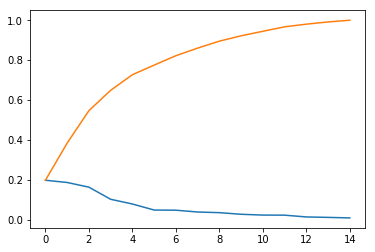

In [231]:
x_train, x_test = forest_decomposition(x_train,x_test,y_train,n_components=3)
print(x_train.shape)
print(x_train)

# PCAによる次元圧縮

In [101]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train,y_train)
print(pca.explained_variance_ratio_)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)
print(x_train.shape)
print(x_train)

[ 0.93015764  0.06984236]
(623, 2)
[[ -5.21992052  21.67574017]
 [ 44.89083361  17.97444368]
 [ 13.59941096 -29.43064452]
 ..., 
 [-24.71740219   1.30580807]
 [-14.85062661   6.91835302]
 [  7.52996583  30.07488324]]


# LDAによる次元圧縮

In [104]:
from sklearn.lda import LDA
lda = LDA(n_components=5)
lda.fit(x_train,y_train)
print(lda.coef_)
x_train = lda.transform(x_train)
x_test = lda.transform(x_test)
print(x_train.shape)
print(x_train)

[[ 0.0102694  -0.01653719]]
(623, 1)
[[ -7.84254708e-01]
 [  3.11666476e-01]
 [  1.19211434e+00]
 [  1.66544903e-01]
 [ -5.37539175e-01]
 [  7.54507309e-01]
 [  4.58369878e+00]
 [ -2.09980199e-01]
 [ -5.17767027e-01]
 [ -3.51736135e-01]
 [ -2.44459262e-01]
 [ -2.50249752e-01]
 [ -3.80292157e-01]
 [ -8.38852445e-02]
 [  3.45562797e-02]
 [ -7.05266287e-01]
 [ -1.87671072e+00]
 [ -3.05480922e-01]
 [ -1.28477172e-01]
 [  1.28733102e-01]
 [ -1.08247269e+00]
 [  3.83450353e-01]
 [ -4.13678803e-01]
 [ -3.72349972e-01]
 [ -3.72944844e-01]
 [ -1.35099456e-01]
 [ -2.28235986e-01]
 [ -4.37094759e-01]
 [ -6.01237587e-01]
 [ -9.50367659e-01]
 [ -6.00544840e-01]
 [ -5.39680221e-01]
 [  2.29272968e-01]
 [ -2.32892346e-01]
 [ -2.70053636e-01]
 [  8.14831785e-01]
 [  5.51197068e-02]
 [ -2.46084698e-01]
 [ -8.27265104e-01]
 [  7.18452628e-01]
 [ -1.08267638e+00]
 [ -3.97816970e-01]
 [ -5.39680221e-01]
 [ -3.48780543e-01]
 [ -1.81040618e-01]
 [ -5.34185572e-01]
 [ -2.90521507e-01]
 [ -2.98145347e-01]
 [ 

C:\Users\User\Documents\anaconda\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [39]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_jobs=-1)
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.svm import SVC
svc = SVC(probability=True,kernel="rbf")
svc_lin = SVC(probability=True,kernel="linear")
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(objective="binary",max_depth=30,n_jobs=-1)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')

In [42]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

depth_ls = [5,10,15,20,25,30]
num_ls = [2**30-1]
lng_ls = [0.01,0.015,0.05,0.1,0.3]
sub_sample_ls = [0.6,0.7,0.8,0.9,1.0]
gamma_ls = [0,0.05,0.1,0.3,0.5]
alpha_ls = [0,0.1,0.5]
lambda_ls = [0.01,0.1]
min_child_ls = [1,3,5,7]
colsample_ls = [0.6,0.7,0.8,0.9,1.0]
lgb_params = {"max_depth":depth_ls[:2],
    "subsample":sub_sample_ls,
    "learning_rate":lng_ls,"min_split_gain":gamma_ls,
    "lambda_l1":alpha_ls,"lambda_l2":lambda_ls}
gbm_params = {"max_depth":depth_ls[:3],
    "subsample":sub_sample_ls,
    "learning_rate":lng_ls}
pen_ls = ["l1","l2"]
c_ls = [0.001,0.01,0.1,1,10,100]
lr_params = {"penalty":pen_ls,"C":c_ls}
svc_params = {"C":c_ls,"gamma":gamma_ls}
est_ls = [60,120,300,500,800,1000]
forest_params = {"max_depth":depth_ls[0],"n_estimators":est_ls}
P_ls = [2,3]
N_neighbors = [2,4,8,16]
ada_params = {"n_estimators":est_ls, "learning_rate":lng_ls}
et_params = {"max_depth":depth_ls[:2],"n_estimators":est_ls}

gs_lgb = GridSearchCV(estimator=lgbm,cv=10,param_grid=lgb_params,n_jobs=-1,verbose=3)
gs_lgb.fit(x_train,y_train)
"""
gs_lr = GridSearchCV(estimator=lr,param_grid=lr_params,n_jobs=-1,cv=10,verbose=1)
gs_lr.fit(x_train,y_train)
#gs_svc = GridSearchCV(estimator=svc,param_grid=svc_params,n_jobs=-1,cv=20,verbose=1)
#gs_svc.fit(x_train,y_train)
gs_for = GridSearchCV(estimator=forest,param_grid=forest_params,cv=10,n_jobs=-1,verbose=1)
gs_for.fit(x_train,y_train)
gs4_knn = GridSearchCV(estimator=knn,param_grid=knn_params,cv=10,n_jobs=-1,verbose=1)
#gs4_knn.fit(x_train,y_train)
gs_svc_lin = GridSearchCV(estimator=svc_lin,param_grid=svc_params,n_jobs=-1,cv=10,verbose=1)
gs_svc_lin.fit(x_train,y_train)
gs_gbm = GridSearchCV(estimator=gbm,cv=10,param_grid=gbm_params,n_jobs=-1,verbose=1)
#gs_gbm.fit(x_train,y_train)
"""
gs_ada = GridSearchCV(estimator=ada,cv=10,param_grid=ada_params,n_jobs=-1,verbose=1)
gs_ada.fit(x_train, y_train)
gs_et = GridSearchCV(estimator=et,cv=10,param_grid=et_params,n_jobs=-1,verbose=1)
gs_et.fit(x_train, y_train)

Fitting 10 folds for each of 1500 candidates, totalling 15000 fits
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0, subsample=0.6 
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0, subsample=0.6 
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0, subsample=0.6 
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0, subsample=0.6 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0, subsample=0.6, score=0.828125 -   0.0s
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0, subsample=0.6, score=0.854839 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0, subsample=0.6 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0, subsample=0.6, score=0.790323 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_

[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0, subsample=1.0 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0, subsample=0.9, score=0.870968 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0, subsample=0.9 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0, subsample=0.9, score=0.887097 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0, subsample=0.9 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0, subsample=0.8, score=0.806452 -   0.1s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0, subsample=1.0 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0, subsample=1.0, score=0.828125 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0, subsample=1.0 


[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.05, subsample=0.8 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.05, subsample=0.9, score=0.828125 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.05, subsample=0.9 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.05, subsample=0.8, score=0.806452 -   0.1s
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.05, subsample=0.8, score=0.903226 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.05, subsample=0.8 
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.05, subsample=0.8 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.05, subsample=0.7, score=0.903226 -   0.1s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split

[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.1s


[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.05, subsample=1.0, score=0.870968 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.05, subsample=1.0 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.05, subsample=0.9, score=0.806452 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.1, subsample=0.6 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.05, subsample=1.0, score=0.825397 -   0.1s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.1, subsample=0.6 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.05, subsample=1.0, score=0.822581 -   0.0s
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.1, subsample=0.6, score=0.828125 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, 

[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.1, subsample=0.8, score=0.903226 -   0.1s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.1, subsample=0.8 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.1, subsample=0.9, score=0.822581 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.1, subsample=0.9 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.1, subsample=0.9, score=0.870968 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.1, subsample=0.9 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.1, subsample=0.9, score=0.806452 -   0.0s
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.1, subsample=0.8, score=0.806452 -   0.1s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_d

[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.3, subsample=0.7, score=0.887097 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.3, subsample=0.7 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.3, subsample=0.8, score=0.870968 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.3, subsample=0.8 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.3, subsample=0.7, score=0.806452 -   0.0s
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.3, subsample=0.8, score=0.806452 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.3, subsample=0.8 
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.3, subsample=0.8 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0

[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.5, subsample=0.6, score=0.822581 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.5, subsample=0.6 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.3, subsample=1.0, score=0.822581 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.5, subsample=0.6 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.5, subsample=0.6, score=0.806452 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.5, subsample=0.7 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.3, subsample=1.0, score=0.870968 -   0.0s
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.5, subsample=0.6, score=0.822581 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_d

[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.5, subsample=0.9, score=0.903226 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.5, subsample=1.0 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.5, subsample=1.0, score=0.806452 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.5, subsample=1.0 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.5, subsample=0.8, score=0.903226 -   0.2s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.5, subsample=0.8 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.5, subsample=0.9, score=0.822581 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0, subsample=0.6 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=5, min_split_gain=0.

[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0, subsample=0.8, score=0.828125 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0, subsample=0.8 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0, subsample=0.7, score=0.806452 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0, subsample=0.9 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0, subsample=0.8, score=0.825397 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0, subsample=0.9 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0, subsample=0.9, score=0.828125 -   0.1s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0, subsample=0.9 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0, subsa

[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0, subsample=1.0, score=0.822581 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.05, subsample=0.8 
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.05, subsample=0.7 
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.05, subsample=0.7 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.05, subsample=0.8, score=0.828125 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.05, subsample=0.8 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.05, subsample=0.7, score=0.806452 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.05, subsample=0.7 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.05, subsam

[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.1, subsample=0.6 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.05, subsample=1.0, score=0.838710 -   0.0s
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.1, subsample=0.6, score=0.854839 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.1, subsample=0.6 
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.05, subsample=1.0 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.05, subsample=1.0, score=0.806452 -   0.1s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.1, subsample=0.6 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.1, subsample=0.6, score=0.790323 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_s

[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.1, subsample=0.8, score=0.870968 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.1, subsample=0.9 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.1, subsample=0.9, score=0.806452 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.1, subsample=0.9 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.1, subsample=0.8, score=0.825397 -   0.1s
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.1, subsample=0.8, score=0.822581 -   0.1s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.1, subsample=1.0 
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.1, subsample=1.0 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_spl

[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.3, subsample=0.8 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.3, subsample=0.8, score=0.825397 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.3, subsample=0.8 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.3, subsample=0.8, score=0.854839 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.3, subsample=0.8 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.3, subsample=0.8, score=0.870968 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.3, subsample=0.8 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.3, subsample=0.8, score=0.822581 -   0.0s
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_spl

[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.3, subsample=1.0 
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.5, subsample=0.7 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.3, subsample=1.0, score=0.822581 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.3, subsample=1.0 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.5, subsample=0.6, score=0.822581 -   0.1s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.5, subsample=0.6 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.3, subsample=1.0, score=0.806452 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.5, subsample=0.7 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.5, subsample=0.

[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:    6.0s


[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.5, subsample=0.8 
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.5, subsample=0.9 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.5, subsample=0.8, score=0.903226 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.5, subsample=0.8 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.5, subsample=0.9, score=0.828125 -   0.0s
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.5, subsample=0.9, score=0.870968 -   0.1s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.5, subsample=0.9 
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.5, subsample=0.9 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.01, max_depth=10, min_split_gain=0.5, subsample=0.

[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0, subsample=0.7 
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0, subsample=0.8 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0, subsample=0.7, score=0.825397 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0, subsample=0.8 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0, subsample=0.7, score=0.806452 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0, subsample=0.7 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0, subsample=0.8, score=0.854839 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0, subsample=0.8 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0, subsample=0.7, score=0.903226 

[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0.05, subsample=0.6 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0.05, subsample=0.6, score=0.758065 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0.05, subsample=0.6 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0, subsample=1.0, score=0.870968 -   0.1s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0.05, subsample=0.6 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0.05, subsample=0.6, score=0.838710 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0.05, subsample=0.6 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0.05, subsample=0.6, score=0.806452 -   0.0s
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, mi

[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0.05, subsample=0.9, score=0.887097 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0.05, subsample=0.9 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0.05, subsample=0.9, score=0.822581 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0.05, subsample=0.9 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0.05, subsample=0.9, score=0.903226 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0.05, subsample=1.0 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0.05, subsample=0.9, score=0.806452 -   0.0s
[CV] lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5, min_split_gain=0.05, subsample=1.0 
[CV]  lambda_l1=0, lambda_l2=0.01, learning_rate=0.015, max_depth=5,

KeyboardInterrupt: 

In [170]:
print(gs_lgb.best_params_,"\nscore:",gs_lgb.best_score_)
print(gs_lr.best_params_,"\nscore:",gs_lr.best_score_)
print(gs_for.best_params_,"\nscore:",gs_for.best_score_)
print(gs_svc_lin.best_params_,"\nscore:",gs_svc_lin.best_score_)

{'max_depth': 30, 'learning_rate': 0.05, 'lambda_l1': 0.1, 'lambda_l2': 0.1, 'min_split_gain': 0.05, 'subsample': 0.6} 
score: 0.8330658105939005
{'penalty': 'l2', 'C': 1} 
score: 0.8041733547351525
{'max_depth': 10, 'n_estimators': 120} 
score: 0.7897271268057785
{'C': 0.1, 'gamma': 0} 
score: 0.7881219903691814


In [476]:
print(gs_ada.best_params_,"\nscore:",gs_ada.best_score_)
print(gs_et.best_params_,"\nscore:",gs_et.best_score_)

{'learning_rate': 0.3, 'n_estimators': 60} 
score: 0.8282504012841091
{'max_depth': 5, 'n_estimators': 1000} 
score: 0.826645264847512


In [171]:
lgbm = gs_lgb.best_estimator_
lr = gs_lr.best_estimator_
forest = gs_for.best_estimator_
svm = gs_svc_lin.best_estimator_

In [189]:
lgbm = lgb.LGBMClassifier(
    max_depth= 10, learning_rate= 0.05, lambda_l1= 0.1,
    lambda_l2= 0.1, min_split_gain= 0.05, subsample= 0.6)
lr = LogisticRegression(penalty="l2", C=0.1)
forest = RandomForestClassifier(max_depth=10, n_estimators=120)
svm = SVC(C=0.1, gamma="auto", probability=True)
ada = AdaBoostClassifier(learning_rate= 0.3, n_estimators= 60)
et = ExtraTreesClassifier(max_depth = 5, n_estimators=1000)

In [188]:
forest = RandomForestClassifier(max_depth=15,n_estimators=120)
forest.fit(x_train,y_train)
svm = SVC(probability=True,C=10,gamma=0.05)
svm.fit(x_train,y_train)
lr = LogisticRegression(C=1,penalty="l2")
lr.fit(x_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
def mk_clf(x_train,y_train,*clfs):
    if len(clfs) > 1:
        clf_ls = []
        for clf in clfs:
            clf_ls.append((str(clf),clf))
        new_clf = VotingClassifier(estimators=clf_ls,n_jobs=-1,voting="soft")
    else:
        new_clf = clfs[0]
    new_clf.fit(x_train,y_train)
    print(accuracy_score(y_true=y_train,y_pred=new_clf.predict(x_train)))
    print(accuracy_score(y_true=y_test,y_pred=new_clf.predict(x_test)))
    return new_clf

In [35]:
new_clf = mk_clf(x_train,y_train,lgbm,forest,svm,lr)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


ValueError: min_weight_fraction_leaf must in [0, 0.5]

In [74]:
score_ls = []
for i in range(20):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
    score_ls.append(accuracy_score(y_test,new_clf.predict(x_test)))
    print(accuracy_score(y_test,new_clf.predict(x_test)))
print("accuracy:",np.mean(score_ls),"+/-",np.std(score_ls))

0.858208955224
0.84328358209
0.832089552239
0.847014925373
0.85447761194
0.850746268657
0.839552238806
0.832089552239
0.832089552239
0.80223880597
0.828358208955
0.824626865672
0.85447761194
0.839552238806
0.828358208955
0.850746268657
0.832089552239
0.820895522388
0.847014925373
0.828358208955
accuracy: 0.837313432836 +/- 0.0134742314069


カテゴリ化　svm 0.81887677175 +/- 0.0478131357673
非カテゴリ化　lr,svm 0.826843536168 +/- 0.059019734912
全部　0.820391923265 +/- 0.0495593393716
svm 0.822004826491 +/- 0.0526570211202
forest,svm 0.812280058651 +/- 0.0453577598613


In [68]:
print(accuracy_score(y_true=y_train,y_pred=new_clf.predict(x_train)))
print(accuracy_score(y_true=y_test,y_pred=new_clf.predict(x_test)))

0.847512038523
0.805970149254


In [470]:
#new_clf2 = VotingClassifier(estimators=[("gs",gs),("gs1",gs1),("gs2",gs2)],n_jobs=-1,voting="soft")
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=new_forest,X=x_train,y=y_train,cv=10,n_jobs=-1,verbose=1)
print(scores)
print(np.mean(scores),"+/-",np.std(scores))

[ 0.77777778  0.80952381  0.80952381  0.85714286  0.84126984  0.77777778
  0.83870968  0.75409836  0.72131148  0.83606557]
0.802320096027 +/- 0.0414508706975


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.0s finished


In [234]:
fore = gs_for.best_estimator_
gbm = gs_gbm.best_estimator_
lr = gs_lr.best_estimator_
svc = gs_svc.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [190]:
from sklearn.model_selection import KFold
ntrain = x_train.shape[0]
ntest = x_test.shape[0]
n_test_tr = test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(n_splits= NFOLDS, random_state=SEED)

def get_oof(clf, x_train, y_train, x_test, test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_tr = np.zeros((n_test_tr))
    oof_train_skf = np.zeros((NFOLDS,ntrain))
    oof_test_skf = np.empty((NFOLDS, ntest))
    oof_test_tr_skf = np.empty((NFOLDS, n_test_tr))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train.iloc[train_index]
        y_tr = y_train.iloc[train_index]
        x_te = x_train.iloc[test_index]

        clf.fit(x_tr, y_tr)

        oof_train_skf[i,:] = clf.predict(x_train)
        oof_test_skf[i, :] = clf.predict(x_test)
        oof_test_tr_skf[i,:] = clf.predict(test)

    oof_train[:] = oof_train_skf.mean(axis=0)
    oof_test[:] = oof_test_skf.mean(axis=0)
    oof_test_tr[:] = oof_test_tr_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1), oof_test_tr.reshape(-1,1)

284

In [191]:
rf_oof_train, rf_oof_test, rf_oof_test_tr = get_oof(forest, x_train, y_train, x_test, test)
lr_oof_train, lr_oof_test, lr_oof_test_tr  = get_oof(lr, x_train, y_train, x_test, test)
svm_oof_train, svm_oof_test, svm_oof_test_tr  = get_oof(svm, x_train, y_train, x_test, test)
lgbm_oof_train, lgbm_oof_test, lgbm_oof_test_tr  = get_oof(lgbm, x_train, y_train, x_test, test)
ada_oof_train, ada_oof_test, ada_oof_test_tr  = get_oof(ada, x_train, y_train, x_test, test)
et_oof_train, et_oof_test, et_oof_test_tr  = get_oof(et, x_train, y_train, x_test, test)

In [192]:
#for i in kf.split(x_train):
#    print(i)
print(rf_oof_train.shape)
print(lr_oof_train.shape)
print(svm_oof_train.shape)
print(lgbm_oof_train.shape)

(916, 1)
(916, 1)
(916, 1)
(916, 1)


In [193]:
x_train["rf"] = rf_oof_train
x_train["ada"] = ada_oof_train
x_train["et"] = et_oof_train
x_train["lgbm"] = lgbm_oof_train
#x_train["svm"] = svm_oof_train
#x_train["lr"] = lr_oof_train

x_test["rf"] = rf_oof_test
x_test["ada"] = ada_oof_test
x_test["et"] = et_oof_test
x_test["lgbm"] = lgbm_oof_test
#x_test["svm"] = svm_oof_test
#x_test["lr"] = lr_oof_test


In [194]:
test["rf"] = rf_oof_test_tr
test["ada"] = ada_oof_test_tr
test["et"] = et_oof_test_tr
test["lgbm"] = lgbm_oof_test_tr
#test["svm"] = svm_oof_test

In [195]:
print(x_train.head())
test.head()

        Pclass       Sex       Age      Fare      Name  death_family   rf  \
501  -1.535975  0.746498 -0.389206  1.324527 -0.788838      0.000000  0.0   
588  -1.535975  0.746498  2.109527  1.324527 -0.788838      0.000000  0.0   
402  -1.535975 -1.339589 -0.389206  1.324527  0.786102      0.380443  1.0   
1193  0.849483  0.746498 -0.389206 -1.324016 -0.788838      0.000000  0.0   
686  -1.535975 -1.339589  2.109527  1.324527  1.573572      0.380443  1.0   

      ada   et  lgbm  
501   0.0  0.0   0.0  
588   0.0  0.0   0.0  
402   1.0  1.0   1.0  
1193  0.0  0.0   0.0  
686   1.0  1.0   1.0  


,Pclass,Sex,Age,Fare,Name,death_family,rf,ada,et,lgbm
1309,0.849483,0.746498,0.860160,-1.324016,-0.788838,0.000000,0.0,0.0,0.0,0.0
1310,0.849483,-1.339589,0.860160,-1.324016,1.573572,0.380443,1.0,1.0,1.0,1.0
1311,-0.343246,0.746498,2.109527,-0.441168,-0.788838,0.000000,0.0,0.0,0.0,0.0
1312,0.849483,0.746498,-0.389206,-0.441168,-0.788838,0.000000,0.0,0.0,0.0,0.0
1313,0.849483,-1.339589,-0.389206,-0.441168,1.573572,1.000000,1.0,1.0,1.0,1.0


In [108]:
x_train_stack = np.concatenate((rf_oof_train, lr_oof_train, svc_oof_train, gbm_oof_train), axis=1)
x_test_stack = np.concatenate((rf_oof_test, lr_oof_test, svc_oof_test, gbm_oof_test), axis=1)
gs_forest_stack = RandomForestClassifier()
gs_forest_stack.fit(x_train_stack, y_train)
print(gs_forest_stack.score(x_train_stack,y_train))
#print(gs_forest_stack.score(x_test_stack,y_test))

0.825040128411


In [196]:
forest_last = RandomForestClassifier(max_depth=10, n_estimators=120) 
lr_last = LogisticRegression(penalty="l2", C=0.1)
svm_last = SVC(C=0.1, gamma="auto", probability=True)
lgbm_last = lgb.LGBMClassifier(max_depth= 4, learning_rate= 0.05, 
                               lambda_l1= 0.1,lambda_l2= 0.1, 
                               min_split_gain= 0.05, subsample= 0.6)
ada_last = AdaBoostClassifier(n_estimators=60, learning_rate=0.3)
et_last = ExtraTreesClassifier(n_estimators=1000, max_depth=5)
forest_last.fit(x_train, y_train)
lr_last.fit(x_train, y_train)
svm_last.fit(x_train, y_train)
lgbm_last.fit(x_train, y_train)
ada_last.fit(x_train, y_train)
et_last.fit(x_train, y_train)
print(forest_last.score(x_train,y_train))
print(lr_last.score(x_train, y_train))
print(svm_last.score(x_train, y_train))
print(lgbm_last.score(x_train, y_train))
print(ada_last.score(x_train, y_train))
print(et_last.score(x_train, y_train))

0.903930131004
0.893013100437
0.886462882096
0.903930131004
0.903930131004
0.903930131004


In [197]:
print(forest_last.score(x_test,y_test))
print(lr_last.score(x_test, y_test))
print(svm_last.score(x_test, y_test))
print(lgbm_last.score(x_test, y_test))
print(ada_last.score(x_test, y_test))
print(et_last.score(x_test, y_test))

0.842239185751
0.842239185751
0.852417302799
0.860050890585
0.842239185751
0.860050890585


In [198]:
vt = VotingClassifier(estimators=[
        ("forest",forest_last),("ada",ada_last),
        ("et",et_last)],n_jobs=-1,
                      voting="hard")
vt.fit(x_train, y_train)
print(vt.score(x_train, y_train))
print(vt.score(x_test, y_test))

0.903930131004
0.842239185751


In [72]:
kf = KFold(n_splits=10, random_state=0)
score_ls = []
for train_id,test_id in kf.split(x_test):
    print(vt.score(x_test.iloc[test_id,:],y_test.values[test_id]))
    score_ls.append(
        vt.score(x_test.iloc[test_id,:],y_test.values[test_id]))
print(np.mean(score_ls),np.std(score_ls))

0.925925925926
0.851851851852
0.851851851852
0.814814814815
0.851851851852
0.740740740741
0.925925925926
0.851851851852
0.846153846154
0.884615384615
0.854558404558 0.0507188526065


In [67]:
y_test

495    0.0
648    0.0
278    0.0
31     1.0
255    1.0
298    1.0
609    1.0
318    1.0
484    1.0
367    1.0
704    0.0
346    1.0
196    0.0
535    1.0
310    1.0
14     0.0
350    0.0
145    0.0
614    0.0
803    1.0
144    0.0
708    1.0
778    0.0
270    0.0
474    0.0
319    1.0
519    0.0
141    1.0
880    1.0
642    0.0
      ... 
272    1.0
154    0.0
832    0.0
820    1.0
382    0.0
20     0.0
585    1.0
65     1.0
680    0.0
878    0.0
304    0.0
823    1.0
521    0.0
333    0.0
698    0.0
481    0.0
71     0.0
49     0.0
573    1.0
338    1.0
261    1.0
116    0.0
76     0.0
48     0.0
843    0.0
263    0.0
718    0.0
620    0.0
786    1.0
64     0.0
Name: Survived, Length: 268, dtype: float64

In [75]:
df3=pd.read_csv("test.csv")
#df3.columns=["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]
#df3=df3.ix[1:,:]

#df3["Cabin"] = cabin_cha(df3["Cabin"].values)
#s = pd.get_dummies(df3["Cabin"])
#df3 = pd.merge(df3,s,left_index=True, right_index=True)

df3["child"]=df3["Age"].apply(lambda x:1 if x < 15 else 0)
df3["Embarked"]=df3["Embarked"].map({"S":1,"Q":2,"C":3})

df3["Name"] = df3["Name"].map(miss_only)
df3["Name"] = df3["Name"].map(mr_to_num)

df4 = df3

sums=sum_maker(df4["SibSp"].values,df4["Parch"].values)
sums=pd.DataFrame(sums.values,index=range(418),columns=["SUM"])
df4=pd.merge(df4,sums,right_index=True,left_index=True)

df4["isalone"] = df4["SUM"].apply(lambda x:1 if x == 0 else 0)
#namesums=name(df4["Name"])
#df4=pd.merge(df4,namesums,right_index=True,left_index=True)

df4["Sex"]=le.transform(df4["Sex"])


#s1=pd.get_dummies(df4["Embarked"])
#df4=pd.merge(df4,s1,right_index=True,left_index=True)
print(df4.head())
df4=df4.ix[:,a]

df4["Embarked"].fillna("S")
df4[df4["Name"]==1]=imr1.transform(df4[df4["Name"]==1])
df4[df4["Name"]==2]=imr2.transform(df4[df4["Name"]==2])
df4[df4["Name"]==3]=imr3.transform(df4[df4["Name"]==3])
df4[df4["Name"]==4]=imr4.transform(df4[df4["Name"]==4])
df4 = pd.DataFrame(imr.transform(df4),columns=a)

df4.ix[df4["Age"] < 16.336,"Age"] = 0
df4.ix[(df4["Age"] < 32.252) & (df4["Age"] >= 16.336),"Age"] = 1
df4.ix[(df4["Age"] < 48.168) & (df4["Age"] >= 32.252),"Age"] = 2
df4.ix[(df4["Age"] < 64.084) & (df4["Age"] >= 48.168),"Age"] = 3
df4.ix[df4["Age"] >= 64.084,"Age"] = 4

df4.ix[df4["Fare"] < 7.91,"Fare"] = 0
df4.ix[(df4["Fare"] < 14.454) & (df4["Fare"] >= 7.91),"Fare"] = 1
df4.ix[(df4["Fare"] < 31) & (df4["Fare"] >= 14.454),"Fare"] = 2
df4.ix[df4["Fare"] >= 31,"Fare"] = 3

df4["Fare"]= sc1.transform(df4["Fare"].reshape(-1,1))
df4["Pclass"]=sc2.transform(df4["Pclass"].reshape(-1,1))
df4["Parch"]=sc3.transform(df4["Parch"].reshape(-1,1))
df4["Age"]=sc4.transform(df4["Age"].reshape(-1,1))
df4["Embarked"] = sc5.transform(df4["Embarked"].reshape(-1,1))
df4["SUM"] = sc6.transform(df4["SUM"].reshape(-1,1))
df4["Sex"] = sc7.transform(df4["Sex"].reshape(-1,1))
df4["Name"] = sc8.transform(df4["Name"].reshape(-1,1))
df4["isalone"] = sc9.transform(df4["isalone"].reshape(-1,1))
#pd.DataFrame(a)
x_te=df4.ix[:,b] #.astype(int)
#x_te.columns=["Pclass","Sex","Age","SibSp","Parch","Fare","miss","mr","mrs","master","SUM","C","Q","S"]
x_te

   PassengerId  Pclass  Name  Sex   Age  SibSp  Parch   Ticket     Fare Cabin  \
0          892       3     1    1  34.5      0      0   330911   7.8292   NaN   
1          893       3     4    0  47.0      1      0   363272   7.0000   NaN   
2          894       2     1    1  62.0      0      0   240276   9.6875   NaN   
3          895       3     1    1  27.0      0      0   315154   8.6625   NaN   
4          896       3     4    0  22.0      1      1  3101298  12.2875   NaN   

   Embarked  child SUM  isalone  
0         2      0   0        1  
1         1      0   1        0  
2         2      0   0        1  
3         1      0   0        1  
4         1      0   2        0  


KeyError: 'SUM'

In [52]:
print(x_train.columns)
print(x_te.columns)

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'SUM', 'Name', 'isalone',
       'Parch'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'SUM', 'Name', 'isalone',
       'Parch'],
      dtype='object')


In [421]:
print(x_train.head(10))
print(test.head(20))

       Pclass       Sex       Age      Fare  Embarked       SUM      Name  \
857 -1.546098  0.743497  1.879729  0.440669 -0.623589 -0.558346 -0.786524   
52  -1.546098 -1.344995  1.879729  1.326744  1.834318  0.073352  1.573048   
386  0.841916  0.743497 -1.744078  1.326744 -0.623589  3.863542  0.000000   
124 -1.546098  0.743497  1.879729  1.326744 -0.623589  0.073352 -0.786524   
578  0.841916 -1.344995  0.671793  0.440669  1.834318  0.073352  1.573048   
549 -0.352091  0.743497 -1.744078  1.326744 -0.623589  0.705051  0.000000   
118 -1.546098  0.743497 -0.536143  1.326744  1.834318  0.073352 -0.786524   
12   0.841916  0.743497 -0.536143 -0.445407 -0.623589 -0.558346 -0.786524   
157  0.841916  0.743497 -0.536143 -0.445407 -0.623589 -0.558346 -0.786524   
127  0.841916  0.743497 -0.536143 -1.331482 -0.623589 -0.558346 -0.786524   

      rf   lr  svm  lgbm  
857  0.0  0.0  0.0   0.0  
52   1.0  1.0  1.0   1.0  
386  0.0  0.0  0.0   0.0  
124  0.0  0.0  0.0   0.0  
578  0.2  1.0  1.

In [45]:
print(x_te.isnull().sum())

Pclass      0
Sex         0
Age         0
Fare        0
isalone     0
Embarked    0
SUM         0
dtype: int64


In [199]:
y_pred=vt.predict(test)
len(y_pred)

418

In [200]:
zip_data = zip(df3.ix[:,0].astype(int), y_pred.astype(int))
predict_data = list(zip_data)
import csv
with open("predcit_result_data.csv","w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(df3.ix[:,0].astype(int), y_pred.astype(int)):
        writer.writerow([pid, survived])

## メモ

In [405]:
#%matplotlib inline
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
training_sizes, train_scores, test_scores = \
    learning_curve(vt,x_test,y,scoring="accuracy", train_sizes = [0.6,0.7,0.8,0.9,1.0],n_jobs=-1)
plt.plot(training_sizes,train_scores.mean(axis=1),label="training_scores")
plt.plot(training_sizes,test_scores.mean(axis=1),label="test_scores")
plt.show()

ImportError: libgthread-2.0.so.0: cannot open shared object file: No such file or directory

In [108]:
memo_df = pd.read_csv("test.csv")
print(memo_df.shape)
print(memo_df.isnull().sum())

(418, 11)
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


          PassengerId  Survived  Pclass  Sex       Age  SibSp  Parch  \
Embarked                                                               
C               74820        93     317   95   4005.92     65     61   
Q               32178        30     224   41    786.50     33     13   
S              289496       217    1514  441  16312.75    368    266   

                Fare  child  
Embarked                     
C         10072.2962     15  
Q          1022.2543      4  
S         17439.3988     59  


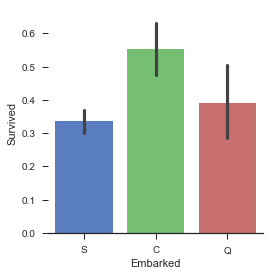

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print(df.groupby("Embarked").sum())
sns.set(style="ticks")
g = sns.factorplot(x="Embarked",y="Survived",kind="bar",data=df,palette="muted")
g.despine(left=True)

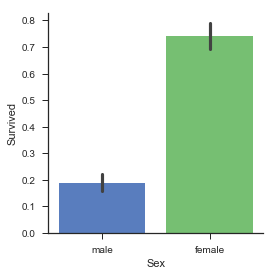

In [81]:
t = sns.factorplot(x="Sex",y="Survived",kind="bar",palette="muted",data=df)

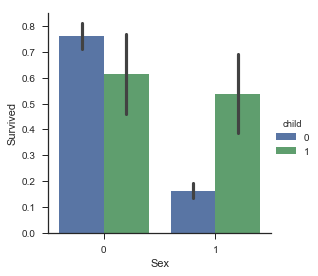

In [90]:
t = sns.factorplot(x="Sex",y="Survived",hue="child",data=df,kind="bar")

In [78]:
#print(len(df.ix[df["Embarked"]=="S","Name"].values))
#print(len(df.ix[df["Embarked"]=="Q","Name"].values))
#print(len(df.ix[df["Embarked"]=="C","Name"].values))
print(df.columns)
print(df.head())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0

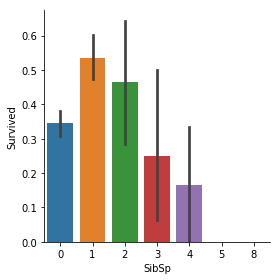

In [72]:
#sns.countplot(x="SibSP",,data=df,kind="bar")
sns.factorplot(x="SibSp",y="Survived",data=df,kind="bar")

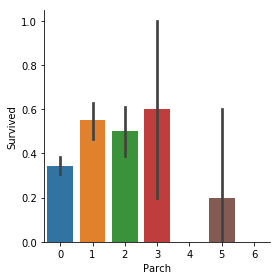

In [73]:
sns.factorplot(x="Parch",y="Survived",data=df,kind="bar")

In [50]:
sns.factorplot(x="SUM",y="Survived",data=df,kind="bar")

ValueError: Could not interpret input 'SUM'

In [95]:
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [345]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,SUM,Name,rf,lr,svm,lgbm
891,0.841916,0.743497,0.671793,-1.331482,0.605364,-0.558346,-0.786524,0.0,0.0,0.0,0.0
892,0.841916,-1.344995,0.671793,-1.331482,-0.623589,0.073352,1.573048,0.8,0.6,1.0,0.2
893,-0.352091,0.743497,1.879729,-0.445407,0.605364,-0.558346,-0.786524,0.0,0.0,0.0,0.0
894,0.841916,0.743497,-0.536143,-0.445407,-0.623589,-0.558346,-0.786524,0.0,0.0,0.0,0.0
895,0.841916,-1.344995,-0.536143,-0.445407,-0.623589,0.705051,1.573048,0.2,1.0,1.0,0.4


In [346]:
x_train.head()

,Pclass,Sex,Age,Fare,Embarked,SUM,Name,rf,lr,svm,lgbm
857,-1.546098,0.743497,1.879729,0.440669,-0.623589,-0.558346,-0.786524,0.0,0.0,0.0,0.0
52,-1.546098,-1.344995,1.879729,1.326744,1.834318,0.073352,1.573048,1.0,1.0,1.0,1.0
386,0.841916,0.743497,-1.744078,1.326744,-0.623589,3.863542,0.000000,0.0,0.0,0.0,0.0
124,-1.546098,0.743497,1.879729,1.326744,-0.623589,0.073352,-0.786524,0.0,0.0,0.0,0.0
578,0.841916,-1.344995,0.671793,0.440669,1.834318,0.073352,1.573048,1.0,1.0,1.0,1.0


In [430]:
df2.groupby("Pclass")["Embarked"].mean()

Pclass
1    1.887850
2    1.227437
3    1.444288
Name: Embarked, dtype: float64

In [426]:
df.head()

,Pclass,Sex,Age,Fare,SUM,Name,Embarked,isalone,Parch,Categorical_Age,Categorical_Fare
0,0.841916,0.743497,-0.536143,-1.331482,0.073352,-0.786524,-0.623589,-1.233758,-0.445,"(16.136, 32.102]","(-0.001, 7.896]"
1,-1.546098,-1.344995,0.671793,1.326744,0.073352,1.573048,1.834318,-1.233758,-0.445,"(32.102, 48.068]","(31.275, 512.329]"
2,0.841916,-1.344995,-0.536143,-0.445407,-0.558346,0.786524,-0.623589,0.810532,-0.445,"(16.136, 32.102]","(7.896, 14.454]"
3,-1.546098,-1.344995,0.671793,1.326744,0.073352,1.573048,-0.623589,-1.233758,-0.445,"(32.102, 48.068]","(31.275, 512.329]"
4,0.841916,0.743497,0.671793,-0.445407,-0.558346,-0.786524,-0.623589,0.810532,-0.445,"(32.102, 48.068]","(7.896, 14.454]"


In [52]:
df.groupby("myoji")["Survived"].mean()

myoji
Abbing          0.000000
Abbott          0.500000
Abelseth             NaN
Abelson         0.500000
Abrahamsson          NaN
Abrahim              NaN
Adahl           0.000000
Adams           0.000000
Ahlin           0.000000
Aks             1.000000
Albimona        1.000000
Aldworth             NaN
Alexander       0.000000
Alhomaki        0.000000
Ali             0.000000
Allen           0.500000
Allison         0.333333
Allum           0.000000
Andersen             NaN
Anderson        1.000000
Andersson       0.222222
Andreasson      0.000000
Andrew          0.000000
Andrews         0.500000
Angheloff            NaN
Angle           1.000000
Appleton        1.000000
Aronsson             NaN
Artagaveytia    0.000000
Ashby                NaN
                  ...   
Wheeler              NaN
White           0.000000
Wick            1.000000
Widegren        0.000000
Widener         0.000000
Wiklund         0.000000
Wilhelms        1.000000
Wilkes               NaN
Willard            

In [33]:
test.head()

,Pclass,Sex,Age,Fare,SUM,Name
891,0.841916,0.743497,0.671793,-1.331482,-0.558346,-0.786524
892,0.841916,-1.344995,0.671793,-1.331482,0.073352,1.573048
893,-0.352091,0.743497,1.879729,-0.445407,-0.558346,-0.786524
894,0.841916,0.743497,-0.536143,-0.445407,-0.558346,-0.786524
895,0.841916,-1.344995,-0.536143,-0.445407,0.705051,1.573048


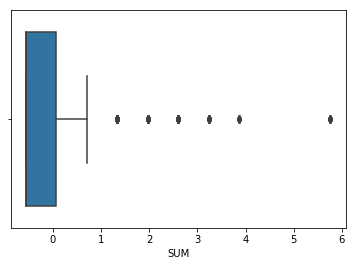

In [252]:
sns.boxplot(x["SUM"])

In [125]:
mean_death_rate["Braund"]

0.0

In [122]:
df["myoji"][0]

'Braund'